### Running a Classification Tree.
Decision trees, and more specifically, classification trees.
Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable.
When the response variable is categorical (two levels), the model is a called a classification tree.
Explanatory variables can be either quantitative, categorical or both.
Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

### Data Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Dataset can be download at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

Decision tree has been applied to classification of breast cancer detection.

Attribute Information:
* id - ID number 
* diagnosis (M = malignant, B = benign) 
* 3-32 extra features

Ten real-valued features are computed for each cell nucleus:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)

All feature values are recoded with four significant digits.  
Missing attribute values: none  
Class distribution: 357 benign, 212 malignant

### Analysis


Decision tree can be found below on the above dataset:

DT is performed to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable (breast cancer diagnosis: malignant or benign). 

Train and test samples in ratio 70\30.

Calculating, confusion matrix and accuracy below= 0.9415204678362573

Some insights from decision tree: 
* The malignant tumor is tend to have much more visible affected areas, texture and concave points, while the benign's characteristics are significantly lower.

    
* The most important features are:      
    * concave points_worst       0.712976
    * radius_worst               0.114146
    * concavity_se               0.030103
    * perimeter_se               0.026538
    * concave points_mean        0.024802
    * fractal_dimension_worst    0.018877
    * fractal_dimension_mean     0.015410


### Code

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
%matplotlib inline

rnd_state = 14823

#### Upload the dataset

In [11]:
br_data = pd.read_csv('Data/breast_cancer.csv')
br_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
#Removing the empty column 'Unnamed: 32'
br_data.drop('Unnamed: 32', axis=1, inplace=True)

In [16]:
# Count the Levels
br_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [17]:
# Converting the Response Column to Binary
br_data.diagnosis = np.where(br_data.diagnosis=='M', 1, 0) 
br_data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
br_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### EDA of the Data
Visualized the data purposes, dimensions number is reduced to two by applying t-SNE method.
Plot shows non-linear relationship, so Decision tree Algo can be use to solv the problem.

In [21]:
model_tsne = TSNE(random_state=rnd_state, n_components=2)
repre = model_tsne.fit_transform(br_data.iloc[:, 2:])

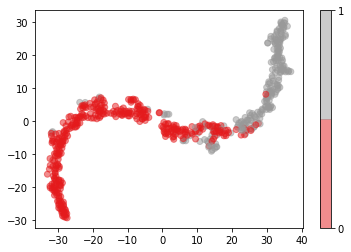

In [22]:
plt.scatter(repre[:, 0], repre[:, 1], 
            c=data.diagnosis, alpha=0.5, cmap=plt.cm.get_cmap('Set1', 2))
plt.colorbar(ticks=range(2));

#### DECISION  TREE  Classifier

In [23]:
# Independent Variables
pred = br_data.iloc[:, 2:]
# Dependent Variable
tar = br_data.diagnosis

To train a Decision tree the dataset was splitted into train and test samples in proportion 70/30.

In [35]:
(pred_train, pred_test,
 tar_train, tar_test) = train_test_split(pred, tar, test_size = .3, random_state = rnd_state)

In [36]:
print('Predictors_train:', pred_train.shape)
print('Predictors_test:', pred_test.shape)
print('Target_train:', tar_train.shape)
print('Target_test:', tar_test.shape)

Predictors_train: (398, 30)
Predictors_test: (171, 30)
Target_train: (398,)
Target_test: (171,)


In [37]:
print(np.sum(tar_train==0))
print(np.sum(tar_train==1))

251
147


In [43]:
# Ratio of the Calsses
print((251)/(251+147))
print((147)/(251+147))

0.6306532663316583
0.3693467336683417


In [44]:
clf = DecisionTreeClassifier(random_state = rnd_state).fit(pred_train, tar_train)

In [45]:
prediction = clf.predict(pred_test)

In [46]:
print('Confusion matrix:\n', pd.crosstab(tar_test, prediction, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(tar_test, prediction))

Confusion matrix:
 Actual       0   1  All
Predicted              
0          101   5  106
1            5  60   65
All        106  65  171

Accuracy:  0.9415204678362573


In [78]:
#Display the DT
#plt.figure(figsize=(40,20))  # customize according to the size of your tree
#_ = tree.plot_tree(clf, feature_names = pred_train.columns)
#plt.show()

In [56]:
feature_importance = pd.Series(clf.feature_importances_, index=br_data.columns.values[2:]).sort_values(ascending=False)
feature_importance

concave points_worst       0.712976
radius_worst               0.114146
concavity_se               0.030103
perimeter_se               0.026538
concave points_mean        0.024802
fractal_dimension_worst    0.018877
fractal_dimension_mean     0.015410
texture_mean               0.013604
fractal_dimension_se       0.012371
concavity_worst            0.010527
smoothness_worst           0.010487
symmetry_se                0.008090
radius_se                  0.002070
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            0.000000
compactness_mean           0.000000
concavity_mean             0.000000
symmetry_mean              0.000000
smoothness_se              0.000000
texture_se                 0.000000
area_se                    0.000000
symmetry_worst             0.000000
compactness_se             0.000000
concave points_se          0.000000
texture_worst              0.000000
perimeter_worst            0.000000
area_worst                 0